# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/bahadiroz/OneDrive - Otokoç Otomotiv Ticaret ve Sanayi A.Ş/Desktop/Bahadır/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#copying data frame for back up
df2= df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print("Total number of rows: ", df.shape[0])
print("Total number of columns: ", df.shape[1])

Total number of rows:  1338
Total number of columns:  7


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in our dataset.

In [8]:
print(df.sex.value_counts(), "\n")    
print(df.smoker.value_counts(), "\n")
print(df.region.value_counts(), "\n")

male      676
female    662
Name: sex, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



We need to encode categorical features in order to check their correlations with dependent variable. We will use the Label Encoding technique.

Note: We can also use One Hot Encoding technique for "Region" feature. We will consider this situation while model tunning process.  

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#age
df.sex = le.fit_transform(df.sex)
#smoker
df.smoker = le.fit_transform(df.smoker)
#region
df.region = le.fit_transform(df.region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


 Sex    |  Female= 0, Male= 1
 
 Smoker |  No=0, Yes= 1
 
 Region |  Northeast= 0, Nortwest= 1, Southeast= 2, Southwest= 3
 

In [10]:
print(df.sex.value_counts(), "\n")    
print(df.smoker.value_counts(), "\n")
print(df.region.value_counts(), "\n")

1    676
0    662
Name: sex, dtype: int64 

0    1064
1     274
Name: smoker, dtype: int64 

2    364
3    325
1    325
0    324
Name: region, dtype: int64 



# EDA Analysis

In [11]:
#Gender Proportion
plt1=df.groupby(["sex"])["age"].count().to_frame()
plt1[("%")]= plt1["age"]/plt1["age"].sum()
plt1


,age,%
sex,,
0,662,0.494768
1,676,0.505232


<AxesSubplot:title={'center':'Gender Proportion'}, ylabel='age'>

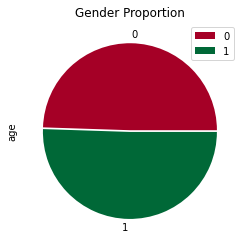

In [12]:
plt1.plot.pie(y="age", title="Gender Proportion",explode=[0.01, 0.01], colormap="RdYlGn")


Our dataset seems like balanced for male/female distribution.

In [13]:
corr = df.corr()["charges"].sort_values(ascending=False).to_frame()
corr

,charges
charges,1.000000
smoker,0.787251
age,0.299008
bmi,0.198341
children,0.067998
sex,0.057292
region,-0.006208


<AxesSubplot:>

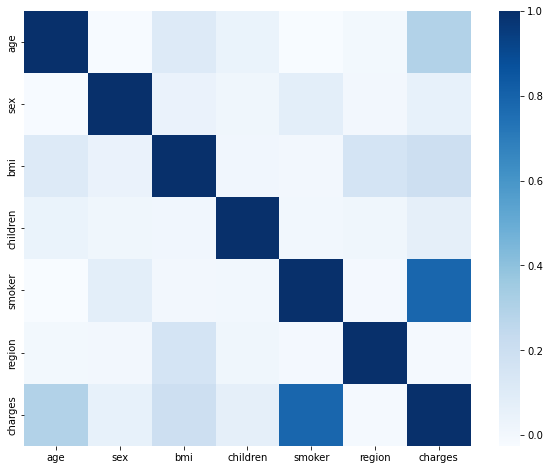

In [14]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=sns.color_palette("Blues", as_cmap=True))

As we may expect, there is a strong relationship between smoking and charges. There are distributions in below.

In [15]:
#average charges values based on smoking
df.groupby(by="smoker").charges.mean().to_frame()

,charges
smoker,
0,8434.268298
1,32050.231832


Text(0.5, 1.0, 'Distribution of charges for non smkokers')

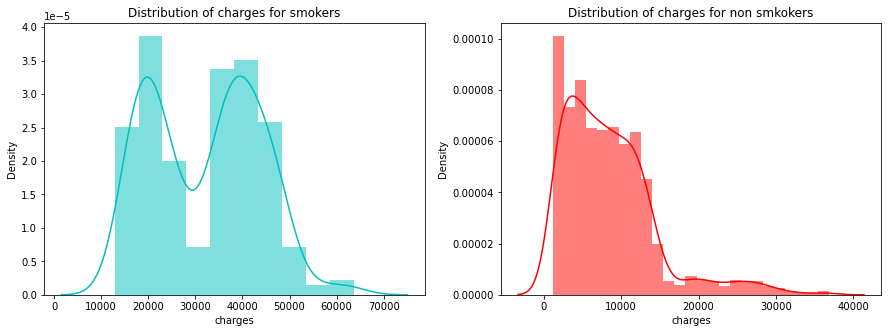

In [16]:
#distribution of charges based on smoking
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.histplot(df[df.smoker==1]["charges"], color="c", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(df[df.smoker==0]["charges"], color="r", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges for non smkokers')

Balanced for regional distribution also.

<AxesSubplot:title={'center':'Regional distribution of genders'}, xlabel='region'>

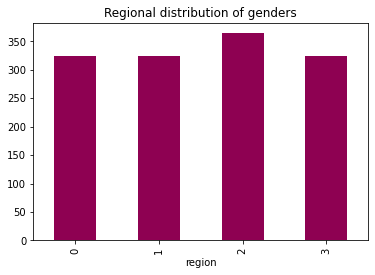

In [17]:
#Regional distribution of genders
region_dist = df.groupby(by= ["region"]).count().age.to_frame()
region_dist.plot(kind="bar", legend=False, title="Regional distribution of genders", colormap="PiYG")

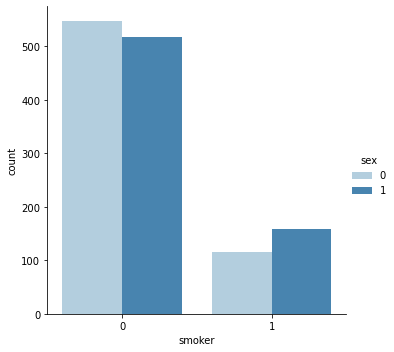

In [18]:
#Gender Proportion based on smoking
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="Blues", data=df)

There are more male smokers than women smokers. As a result of the graph we can assume that the total cost of treatment in men will be more than in women. Let's check it.


In [19]:
#average charges values based on genders
df.groupby(by="sex").charges.mean().to_frame()

,charges
sex,
0,12569.578844
1,13956.751178


To be honest, I was waiting a little bigger difference. Time to check disribution for charges.

Text(0.5, 1.0, 'Distirbution of charges')

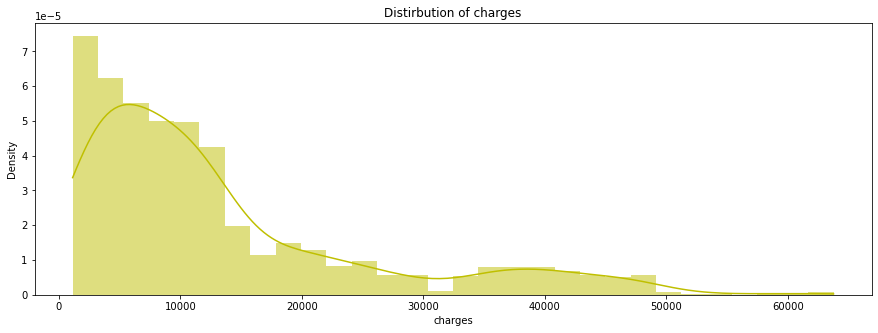

In [20]:
#distribution of charges
f=plt.figure(figsize=(15,5))

ax = sns.histplot(df.charges, color="y", kde=True,  stat="density",linewidth=0)
ax.set_title("Distirbution of charges")

Text(0.5, 1.0, 'Distribution of charges for men')

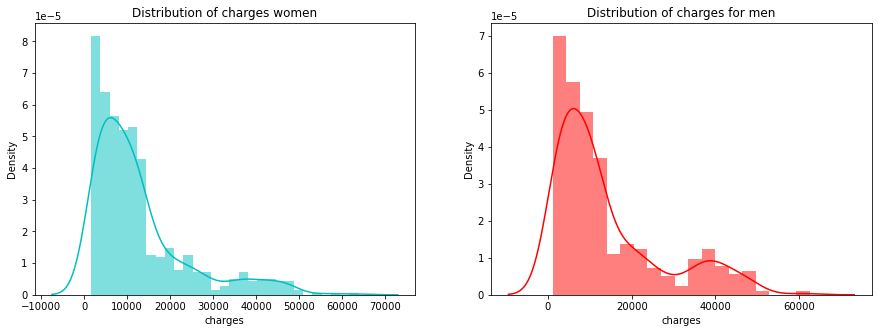

In [21]:
#distribution of charges based on gender
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.histplot(df[df.sex==0]["charges"], color="c", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges women')

ax=f.add_subplot(122)
sns.histplot(df[df.sex==1]["charges"], color="r", kde=True,  stat="density",linewidth=0, kde_kws=dict(cut=3))
ax.set_title('Distribution of charges for men')

Let's check out is there any logical relationship between regions and charges. 

In [22]:
#average charges values for regions
charges_ = df.groupby(by="region").mean().charges.to_frame().sort_values(by="charges", ascending=False) 
charges_


,charges
region,
2,14735.411438
0,13406.384516
1,12417.575374
3,12346.937377


The highest average charges value belongs to the Southeast region which is labeled "2".

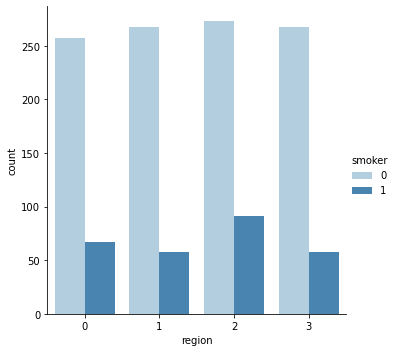

In [23]:
#Smoking status by region
sns.catplot(x="region", kind="count",hue = 'smoker', palette="Blues", data=df)

Region 2 has more smokers than other regions. But we should remember that there are more observations for region 2 in our dataset.

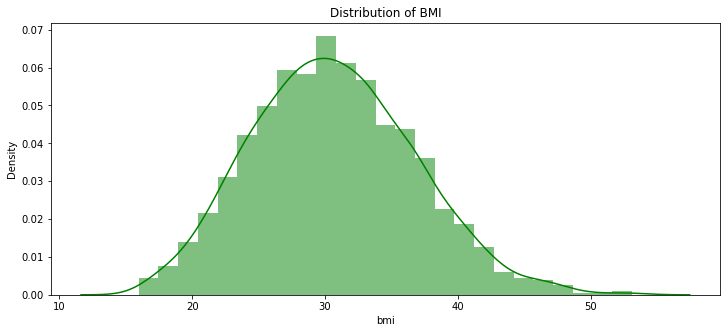

In [24]:
#distribution of bmi
f=plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.histplot(df.bmi, kde=True, stat="density", linewidth=0, color="g", kde_kws=dict(cut=3) )

<Figure size 864x360 with 0 Axes>

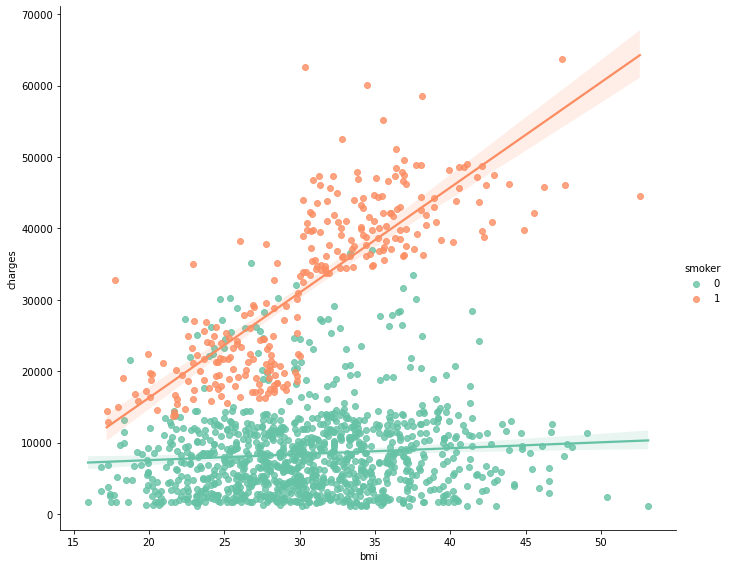

In [25]:
#Scatter plot of BMI and Charges
f= plt.figure(figsize=(12,5))
ax =sns.lmplot(x = "bmi", y = "charges", data=df, hue='smoker', palette='Set2', height=8, aspect=1.2)

We clearly say that smoker individuals with high bmi indexes are closer to higher charges values.

# MODELLING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [27]:
y= df["charges"] #dependent variables
X= df.drop(["charges"], axis=1) #independent variables

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
print(lr.intercept_, "\n")
print(lr.coef_.reshape(-1,1))

-11946.606567263041 

[[ 2.57056264e+02]
 [-1.87914567e+01]
 [ 3.35781491e+02]
 [ 4.25091456e+02]
 [ 2.36478181e+04]
 [-2.71284266e+02]]


In [38]:
y_pred = lr.predict(X_test)

In [32]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results


,Actual,Predicted
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008
...,...,...
109,47055.53210,39116.968669
575,12222.89830,11814.555568
535,6067.12675,7638.107736
543,63770.42801,40959.081722


In [33]:
#model performance

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", metrics.r2_score(y_test, y_pred), "\n")
print("Score: ", lr.score(X_test, y_test))

MAE:  4186.5088983664355
MSE:  33635210.431178406
RMSE:  5799.587091438356
R2:  0.7833463107364539 

Score:  0.7833463107364539
